In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
t_range = pd.date_range('2016-01-01', '2016-12-31')

In [3]:
t_range

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [4]:
s1 = Series(np.random.randn(len(t_range)), index=t_range)

In [5]:
s1

2016-01-01    1.322297
2016-01-02   -0.299011
2016-01-03    0.604256
2016-01-04   -0.342002
2016-01-05   -0.410351
                ...   
2016-12-27   -0.174955
2016-12-28    1.818230
2016-12-29   -0.365831
2016-12-30    0.735189
2016-12-31   -1.463379
Freq: D, Length: 366, dtype: float64

In [6]:
s1_month = s1.resample('M').mean()

In [7]:
s1_month

2016-01-31    0.108600
2016-02-29   -0.088036
2016-03-31   -0.075583
2016-04-30    0.161070
2016-05-31   -0.178712
2016-06-30    0.284332
2016-07-31   -0.098034
2016-08-31    0.055925
2016-09-30   -0.146815
2016-10-31   -0.070925
2016-11-30    0.372660
2016-12-31   -0.024322
Freq: M, dtype: float64

In [8]:
s1.resample('H').ffill()

2016-01-01 00:00:00    1.322297
2016-01-01 01:00:00    1.322297
2016-01-01 02:00:00    1.322297
2016-01-01 03:00:00    1.322297
2016-01-01 04:00:00    1.322297
                         ...   
2016-12-30 20:00:00    0.735189
2016-12-30 21:00:00    0.735189
2016-12-30 22:00:00    0.735189
2016-12-30 23:00:00    0.735189
2016-12-31 00:00:00   -1.463379
Freq: H, Length: 8761, dtype: float64

In [9]:
s1.resample('H').bfill()

2016-01-01 00:00:00    1.322297
2016-01-01 01:00:00   -0.299011
2016-01-01 02:00:00   -0.299011
2016-01-01 03:00:00   -0.299011
2016-01-01 04:00:00   -0.299011
                         ...   
2016-12-30 20:00:00   -1.463379
2016-12-30 21:00:00   -1.463379
2016-12-30 22:00:00   -1.463379
2016-12-30 23:00:00   -1.463379
2016-12-31 00:00:00   -1.463379
Freq: H, Length: 8761, dtype: float64

# 模拟个股票的图

In [10]:
t_range = pd.date_range('2016-01-01', '2016-12-31', freq='H')

In [11]:
t_range

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2016-12-30 15:00:00', '2016-12-30 16:00:00',
               '2016-12-30 17:00:00', '2016-12-30 18:00:00',
               '2016-12-30 19:00:00', '2016-12-30 20:00:00',
               '2016-12-30 21:00:00', '2016-12-30 22:00:00',
               '2016-12-30 23:00:00', '2016-12-31 00:00:00'],
              dtype='datetime64[ns]', length=8761, freq='H')

In [12]:
stock_df = DataFrame(index=t_range)

In [13]:
stock_df.head()

""
2016-01-01 00:00:00
2016-01-01 01:00:00
2016-01-01 02:00:00
2016-01-01 03:00:00
2016-01-01 04:00:00


In [14]:
stock_df['BABA'] = np.random.randint(80,160,size=len(t_range))

In [15]:
stock_df.head()

,BABA
2016-01-01 00:00:00,92
2016-01-01 01:00:00,103
2016-01-01 02:00:00,151
2016-01-01 03:00:00,144
2016-01-01 04:00:00,145


In [16]:
stock_df['TENCENT'] = np.random.randint(30,50,len(t_range))

In [17]:
stock_df.head()

,BABA,TENCENT
2016-01-01 00:00:00,92,32
2016-01-01 01:00:00,103,40
2016-01-01 02:00:00,151,36
2016-01-01 03:00:00,144,36
2016-01-01 04:00:00,145,48


<AxesSubplot:>

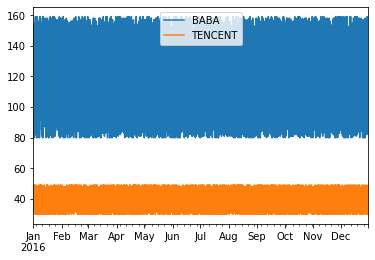

In [18]:
stock_df.plot()

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.show()

In [23]:
weekly_df = DataFrame()

In [24]:
weekly_df['BABA'] = stock_df['BABA'].resample('W').mean()

In [25]:
weekly_df['TENCENT'] = stock_df['TENCENT'].resample('W').mean()

In [26]:
weekly_df

,BABA,TENCENT
2016-01-03,120.361111,39.833333
2016-01-10,120.779762,39.244048
2016-01-17,121.535714,39.904762
2016-01-24,120.089286,39.315476
2016-01-31,116.511905,40.166667
2016-02-07,119.273810,39.767857
2016-02-14,119.880952,40.642857
2016-02-21,119.690476,39.452381
2016-02-28,119.928571,39.535714
2016-03-06,117.190476,38.940476


<AxesSubplot:>

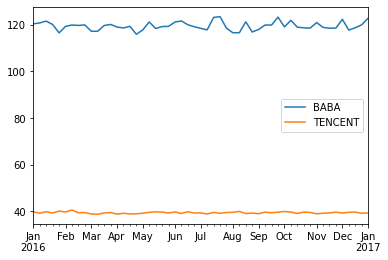

In [27]:
weekly_df.plot()